# Sample Straint - Income Predictor 

## Exploratory Data Analysis (2/3)

## Contents
- [Data Import](#Data-Import)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - Correlation between dependent variables and wage
    - The percentage breakdown of wages by education levels
    - The percentage breakdown of wages by occupation
    - The percentage breakdown of wages by marital status

## Data Import

### Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import

In [2]:
# Read in the data
df = pd.read_csv('../data/cheap_train_sample_clean.csv', skipinitialspace=True)

# Review 
df.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,sex_Male,marital-status_Married-AF-spouse,...,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,56,346033,5,0,0,40,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1,28,96226,9,0,0,45,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,2,33,251120,13,7688,0,50,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,26,178140,13,0,0,45,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,4,40,56795,14,14084,0,55,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
# Check for missing values 
df.isnull().sum()

Unnamed: 0                    0
age                           0
fnlwgt                        0
education-num                 0
capital-gain                  0
                             ..
workclass_Private             0
workclass_Self-emp-inc        0
workclass_Self-emp-not-inc    0
workclass_State-gov           0
workclass_Without-pay         0
Length: 79, dtype: int64

In [4]:
# Read in original data for EDA
df1 = pd.read_csv('../data/original/cheap_train_sample.csv', skipinitialspace=True)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


## Exploratory Data Analysis

### Correlation between dependent variables and `wage`

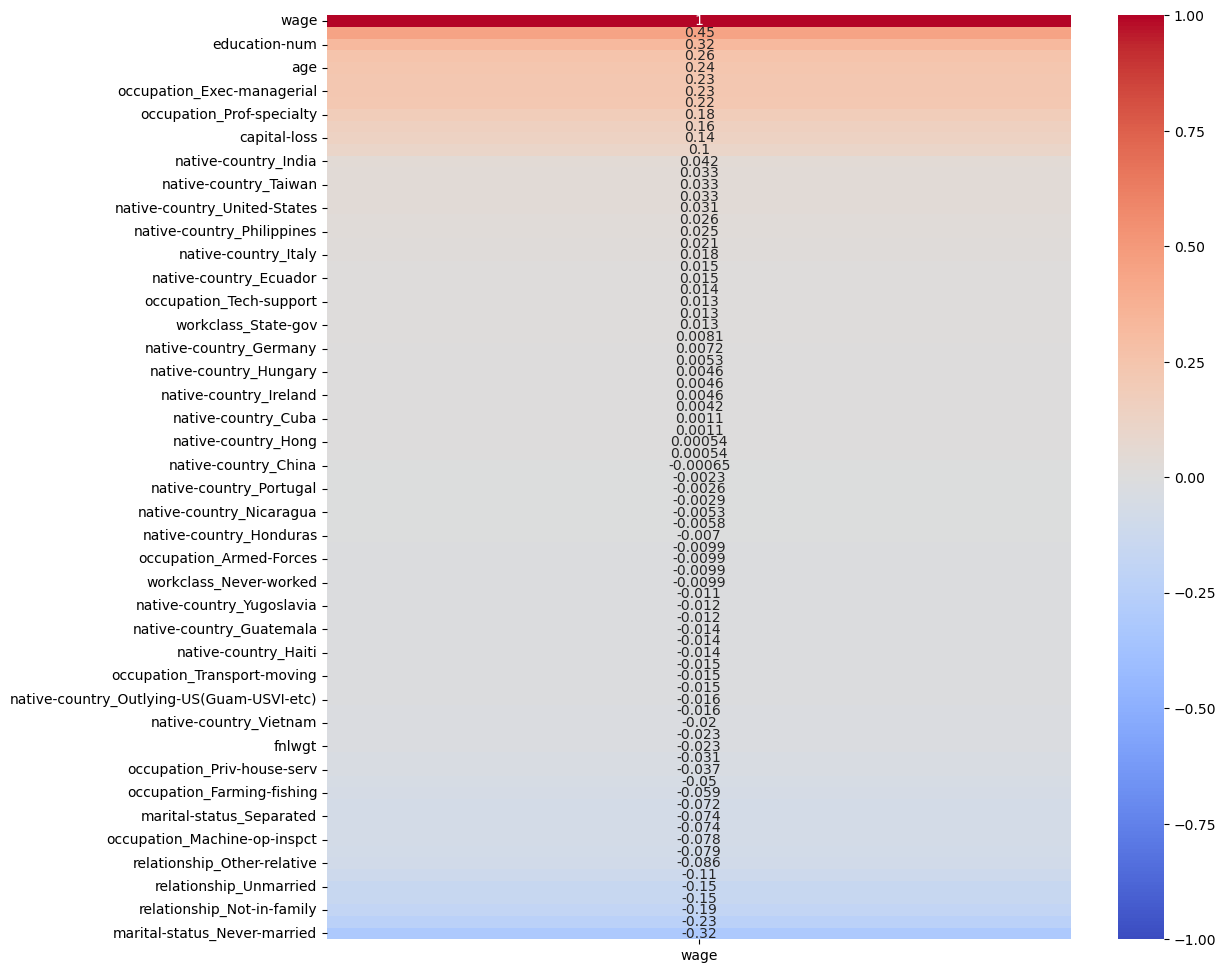

In [5]:
# Create a correlation dataset
corr = df.corr()[['wage']].sort_values(by='wage', ascending=False)

# Size
plt.figure(figsize=(12, 12))

# Plot
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

### The percentage breakdown of wages by education levels

In [6]:
# Edit education levels
df1['education'] = df1['education'].replace(to_replace={'9th':'some-HS'})
df1['education'] = df1['education'].replace(to_replace={'10th':'some-HS'})
df1['education'] = df1['education'].replace(to_replace={'11th':'some-HS'})
df1['education'] = df1['education'].replace(to_replace={'12th':'some-HS'})
df1['education'] = df1['education'].replace(to_replace={'7th-8th':'some-MS'})
df1['education'] = df1['education'].replace(to_replace={'5th-6th':'some-MS'})
df1['education'] = df1['education'].replace(to_replace={'1st-4th':'some-ES'})

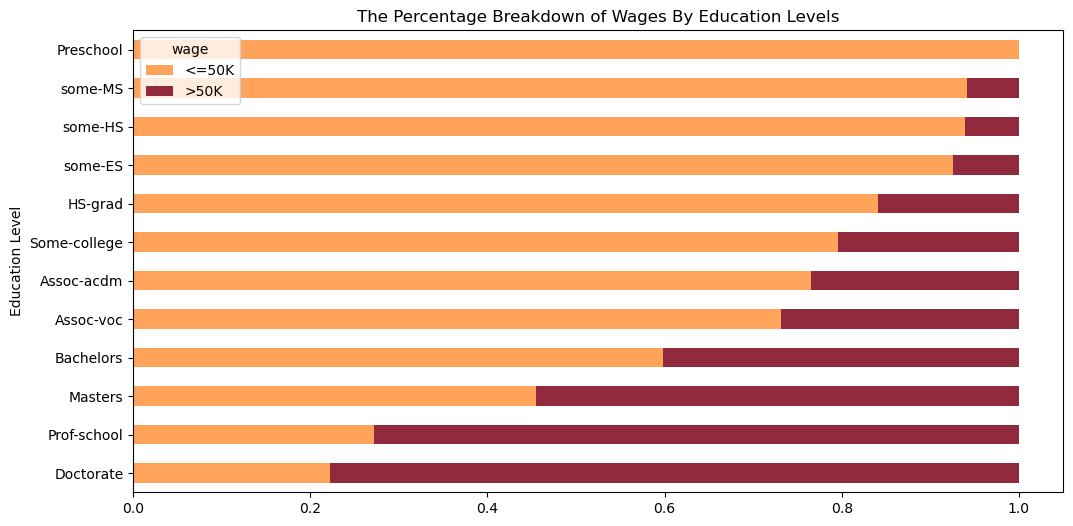

In [7]:
# Sort
education_wage = df1.groupby('education')['wage'].value_counts(normalize = True).unstack(1)
education_wage_50 = education_wage.sort_values(by = '<=50K')

# Plot
education_wage_50.plot(kind = 'barh', 
                       color = ('#ffa35a', '#912a3c'), 
                       stacked = True, 
                       title = 'The Percentage Breakdown of Wages By Education Levels',
                       figsize = (12, 6), 
                       ylabel='Percentage (%)', 
                       xlabel='Education Level',
                       );

### The percentage breakdown of wages by occupation

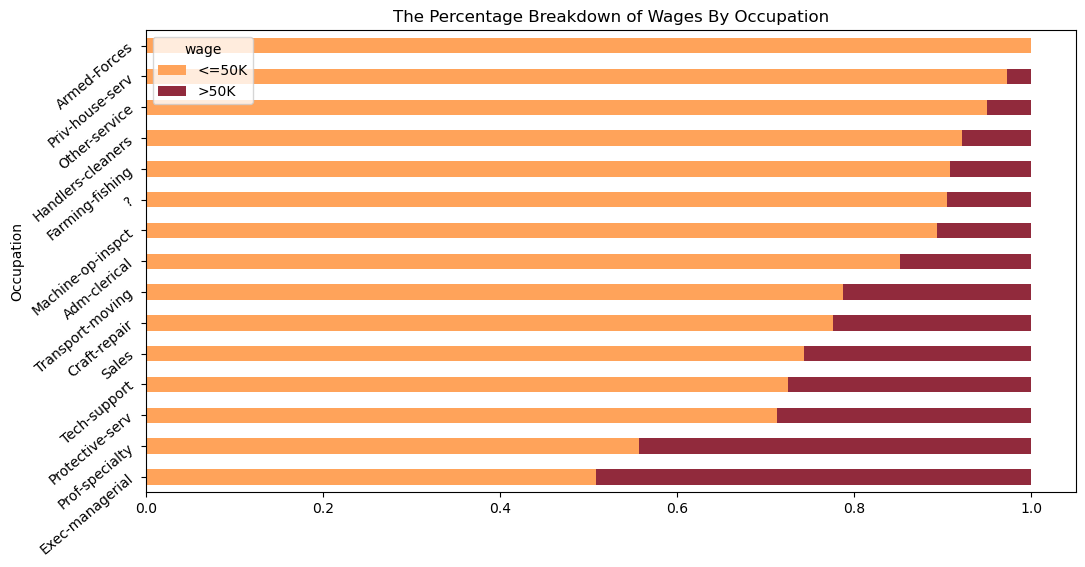

In [8]:
# Sort
occupation_wage = df1.groupby('occupation')['wage'].value_counts(normalize = True).unstack(1)
occupation_wage_50 = occupation_wage.sort_values(by = '<=50K')

# Plot
occupation_wage_50.plot(kind = 'barh', 
                        color = ('#ffa35a', '#912a3c'), 
                        stacked = True, 
                        title = 'The Percentage Breakdown of Wages By Occupation',
                        figsize = (12, 6), 
                        ylabel='Percentage (%)', 
                        xlabel='Occupation', 
                        rot = 40
                       );

### The percentage breakdown of wages by marital status

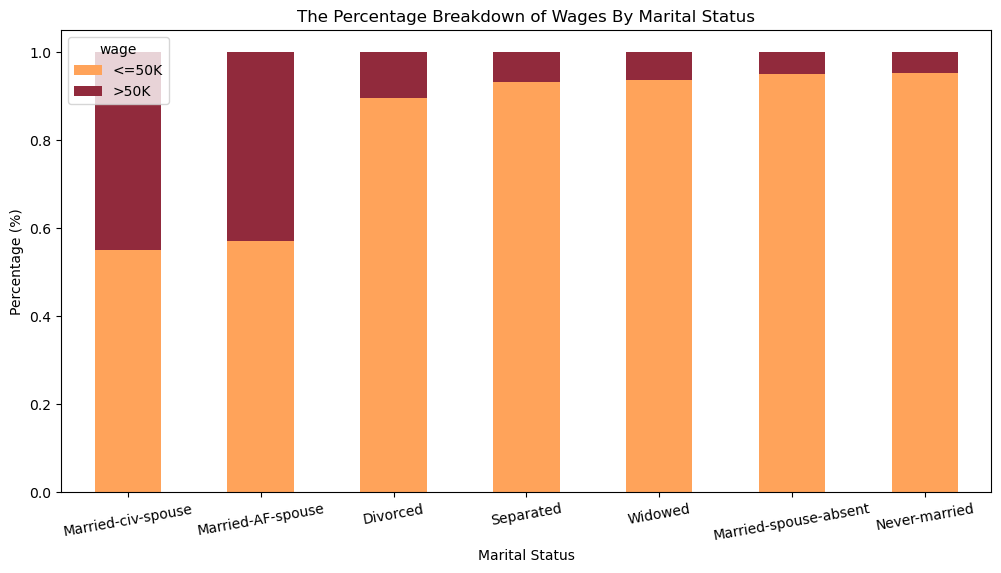

In [9]:
# Sort
marital_status_wage = df1.groupby('marital-status')['wage'].value_counts(normalize = True).unstack(1)
marital_status_wage_50 = marital_status_wage.sort_values(by = '<=50K')

# Plot
marital_status_wage_50.plot(kind = 'bar', 
                            color = ('#ffa35a', '#912a3c'), 
                            stacked = True, 
                            title = 'The Percentage Breakdown of Wages By Marital Status',
                            figsize = (12, 6), 
                            xlabel = 'Marital Status', 
                            ylabel='Percentage (%)', 
                            rot = 10);

In [10]:
# Presentation Colors: 
# 912a3c / #ffa35a / #dc7c61 / #ba6136 / #005458 / #528c98 / #2c8c64 / #151f29 / #ebe0dd